In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## 1. Install MMDetection

In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.1.2

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 6.7MB 59.6MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 317kB 8.3MB/s 
     |████████████████████████████████| 194kB 13.9MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.7-cp37-cp37m-linux_x86_64.whl size=25648308 sha256=b146cf2f425f37d86e693ee275f03d83b5417280264fa8dccb10c51c14f46f7a
  Stored in directory: /root/.cache/pip/wheels/d5/6d/0d/ddcbe32bbab2e52827d8cc7bfbfa988a89329fca62d5d87b03
Successfully built mmcv-full
Cl

In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.13.0
11.0
GCC 7.5


## 2. Download Checkpoints



In [4]:
# Download the pretrained model checkpoints.

#Faster R-CNN
!mkdir checkpoints
!wget -c https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
#Cascade R-CNN
!wget -c https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth \
      -O checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth

--2021-06-20 10:59:12--  https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)... 52.219.56.31
Connecting to open-mmlab.s3.ap-northeast-2.amazonaws.com (open-mmlab.s3.ap-northeast-2.amazonaws.com)|52.219.56.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/x-www-form-urlencoded]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  21.0MB/s    in 9.2s    

2021-06-20 10:59:22 (18.5 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



## 3. Prepare dataset

### 3.1 Download dataset

###Here we download the datasets from Drive, we have the dataset in the server.

In [5]:
#Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Upload train and valid datasets with a 80/20 split
%cp /content/drive/MyDrive/TFG/Database/dataset.zip dataset.zip
!unzip dataset.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: dataset/train/Japan_011860.jpg  
  inflating: dataset/train/Japan_011861.jpg  
  inflating: dataset/train/Japan_011862.jpg  
  inflating: dataset/train/Japan_011863.jpg  
  inflating: dataset/train/Japan_011865.jpg  
  inflating: dataset/train/Japan_011867.jpg  
  inflating: dataset/train/Japan_011868.jpg  
  inflating: dataset/train/Japan_011869.jpg  
  inflating: dataset/train/Japan_011870.jpg  
  inflating: dataset/train/Japan_011871.jpg  
  inflating: dataset/train/Japan_011872.jpg  
  inflating: dataset/train/Japan_011873.jpg  
  inflating: dataset/train/Japan_011875.jpg  
  inflating: dataset/train/Japan_011877.jpg  
  inflating: dataset/train/Japan_011878.jpg  
  inflating: dataset/train/Japan_011879.jpg  
  inflating: dataset/train/Japan_011881.jpg  
  inflating: dataset/train/Japan_011882.jpg  
  inflating: dataset/train/Japan_011883.jpg  
  inflating: dataset/train/Japan_011884.jpg  
  inflating: datase

In [7]:
#Upload test dataset
%cp /content/drive/MyDrive/TFG/Database/test.zip test.zip
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/Czech_000004.jpg   
  inflating: test/Czech_000016.jpg   
  inflating: test/Czech_000019.jpg   
  inflating: test/Czech_000026.jpg   
  inflating: test/Czech_000035.jpg   
  inflating: test/Czech_000042.jpg   
  inflating: test/Czech_000051.jpg   
  inflating: test/Czech_000053.jpg   
  inflating: test/Czech_000059.jpg   
  inflating: test/Czech_000073.jpg   
  inflating: test/Czech_000082.jpg   
  inflating: test/Czech_000088.jpg   
  inflating: test/Czech_000094.jpg   
  inflating: test/Czech_000096.jpg   
  inflating: test/Czech_000099.jpg   
  inflating: test/Czech_000114.jpg   
  inflating: test/Czech_000116.jpg   
  inflating: test/Czech_000130.jpg   
  inflating: test/Czech_000138.jpg   
  inflating: test/Czech_000166.jpg   
  inflating: test/Czech_000169.jpg   
  inflating: test/Czech_000172.jpg   
  inflating: test/Czech_000198.jpg   
  inflating: test/Czech_000210.jpg   
  inflating: test/Czech_000216.jpg   
  inflating:

In [8]:
#Small second test dataset
%cd dataset/
!curl -L "https://app.roboflow.com/ds/QnXSz7NNyH?key=hBj8suOmOZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd ..

/content/mmdetection/dataset
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1529      0 --:--:-- --:--:-- --:--:--  1526
100 51.9M  100 51.9M    0     0  31.9M      0  0:00:01  0:00:01 --:--:-- 81.5M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Czech_000000_jpg.rf.e4da0851f32e5ba223ab8942b7d09a6e.jpg  
 extracting: test/Czech_000001_jpg.rf.ba0a4fc52093a03a9dc19dfb77ebee4d.jpg  
 extracting: test/Czech_000002_jpg.rf.0ee38c28d09b44e9870b0d94b3376e30.jpg  
 extracting: test/Czech_000006_jpg.rf.ea6d8f042c0a1556ec11ff823b408a3f.jpg  
 extracting: test/Czech_000007_jpg.rf.d5d12baacb825c1fc32fb28b5b12fe56.jpg  
 extracting: test/Czech_000009_jpg.rf.11d8415530df083bc8c1b4b14299803c.jpg  
 extracting: test/Czech_000010_jpg.rf.136559b185bc20610a0f4d61a7ee9ca6.jpg  
 extracting: test/Czech_000011_jpg.r

#Parts 4 and 5 have to be executes separately. If you want to train the Faster R-CNN you only Execute 4 and 6. If you want to train the de Cascade-RCNN you execute 5 and 7.

We recomend to skip this part and train the detectors in the servers of the TSC.

##4. FASTER R-CNN
  Modify Config

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np
import matplotlib.pyplot as plt

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

### Here we import the original config, not needed if you are not going to train:

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

###This cell is for modyfing the config, not necesary if you are not going to train the detector:

In [ ]:
from mmdet.apis import set_random_seed

# MAX EPOCHS
cfg.runner.max_epochs=4

cfg.log_config.hooks=[dict(type='TextLoggerHook'),dict(type='TensorboardLoggerHook')]

# Modify dataset type and path
cfg.dataset_type = 'CocoDataset'
cfg.data_root = 'dataset/'

cfg.data.test.type = 'CocoDataset'
cfg.data.test.data_root = 'dataset/valid/'
cfg.data.test.ann_file = 'anotations.json'
cfg.data.test.img_prefix = ''
cfg.data.test.classes=('D00','D10','D20','D40','D43','D44','D50')

cfg.data.train.type = 'CocoDataset'
cfg.data.train.data_root = 'dataset/train/'
cfg.data.train.ann_file = 'anotations.json'
cfg.data.train.img_prefix = ''
cfg.data.train.classes=('D00','D10','D20','D40','D43','D44','D50')

cfg.data.val.type = 'CocoDataset'
cfg.data.val.data_root = 'dataset/valid/'
cfg.data.val.ann_file = 'anotations.json'
cfg.data.val.img_prefix = ''
cfg.data.val.classes=('D00','D10','D20','D40','D43','D44','D50')

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 7
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '/content/drive/MyDrive/TFG/Checkpoints/FasterRCNN/20211005/epoch_12.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './resultats'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
#cfg.evaluation.metric = 'proposal_fast'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    pretrained='open-mmlab://detectron2/resnet50_caffe',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        los

##5. Cascade R-CNN
  Modify Config

In [ ]:
import copy
import os.path as osp

import mmcv
import numpy as np
import matplotlib.pyplot as plt

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
from mmdet.apis import set_random_seed

# MAX EPOCHS
cfg.runner.max_epochs=2

cfg.log_config.hooks=[dict(type='TextLoggerHook'),dict(type='TensorboardLoggerHook')]

# Modify dataset type and path
cfg.dataset_type = 'CocoDataset'
cfg.data_root = 'dataset/'

cfg.data.test.type = 'CocoDataset'
cfg.data.test.data_root = 'dataset/valid/'
cfg.data.test.ann_file = 'anotations.json'
cfg.data.test.img_prefix = ''
cfg.data.test.classes=('D00','D10','D20','D40','D43','D44','D50')

cfg.data.train.type = 'CocoDataset'
cfg.data.train.data_root = 'dataset/train/'
cfg.data.train.ann_file = 'anotations.json'
cfg.data.train.img_prefix = ''
cfg.data.train.classes=('D00','D10','D20','D40','D43','D44','D50')

cfg.data.val.type = 'CocoDataset'
cfg.data.val.data_root = 'dataset/valid/'
cfg.data.val.ann_file = 'anotations.json'
cfg.data.val.img_prefix = ''
cfg.data.val.classes=('D00','D10','D20','D40','D43','D44','D50')

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head[0].num_classes = 7
cfg.model.roi_head.bbox_head[1].num_classes = 7
cfg.model.roi_head.bbox_head[2].num_classes = 7
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './resultats'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
#cfg.evaluation.metric = 'proposal_fast'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

##6. Train Faster R-CNN

###This part is only from training, if you are going to use a big dataset use the second option and train it in the server

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

TensorBoard:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir resultats/ 

In [ ]:
#Save the weight and results into google colab this is used only if you train the detector
%cp /content/mmdetection/resultats/epoch_1.pth /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/resultats/epoch_2.pth /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/resultats/epoch_3.pth /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/resultats/epoch_4.pth /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/resultats/latest.pth /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/resultats/None.log.json /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN
%cp /content/mmdetection/mmdetection/resultats/tf_logs/events.out.tfevents.1620671207.02d5f2309743.1521.0 /content/drive/MyDrive/TFG/Checkpoints/FasterRCNN

##7. Train Cascade R-CNN

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir resultats/ 

In [ ]:
#Save the weight and results into google colab this is used only if you train the detector
%cp /content/mmdetection/resultats/epoch_1.pth /content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN
%cp /content/mmdetection/resultats/epoch_2.pth /content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN
%cp /content/mmdetection/resultats/latest.pth /content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN
%cp /content/mmdetection/resultats/None.log.json /content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN
%cp /content/mmdetection/mmdetection/resultats/tf_logs/events.out.tfevents.1620671207.02d5f2309743.1521.0 /content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN

##8. Image exemple and Non-maxima suppression

In this part it is shown some results and how the Non-maxima suppresion works.

In [9]:
#Intersection IOU
import torch


def intersection_over_union(boxes_preds, boxes_labels, box_format):
    """
    Calculates intersection over union
    Parameters:
        boxes_preds (tensor): Predictions of Bounding Boxes (BATCH_SIZE, 4)
        boxes_labels (tensor): Correct Labels of Boxes (BATCH_SIZE, 4)
        box_format (str): (x1,y1,x2,y2)
    Returns:
        tensor: Intersection over union for all examples
    """
   
   #Preprare the bbox in the format (x1,y1,x2,y2)
    boxes_preds[2] = boxes_preds[2]+boxes_preds[0]
    boxes_preds[3] = boxes_preds[3]+boxes_preds[1]
    boxes_labels[2] = boxes_labels[2]+boxes_labels[0]
    boxes_labels[3] = boxes_labels[3]+boxes_labels[1]
    #Save each coordinate in variable to process later
    box1_x1 = boxes_preds[..., 0:1]
    box1_y1 = boxes_preds[..., 1:2]
    box1_x2 = boxes_preds[..., 2:3]
    box1_y2 = boxes_preds[..., 3:4]
    box2_x1 = boxes_labels[..., 0:1]
    box2_y1 = boxes_labels[..., 1:2]
    box2_x2 = boxes_labels[..., 2:3]
    box2_y2 = boxes_labels[..., 3:4]

    x1 = torch.max(box1_x1, box2_x1)
    y1 = torch.max(box1_y1, box2_y1)
    x2 = torch.min(box1_x2, box2_x2)
    y2 = torch.min(box1_y2, box2_y2)

    # Need clamp(0) in case they do not intersect, then we want intersection to be 0
    intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

    return intersection / (box1_area + box2_area - intersection + 1e-6)

In [10]:
#Non-maxima supression
import torch
import numpy as np

#from iou import intersection_over_union

def nms(bboxes, iou_threshold, threshold, box_format):
    """
    Does Non Max Suppression given bboxes
    Parameters:
        bboxes (list): list of lists containing all bboxes with each bboxes
        specified as [class_pred, prob_score, x1, y1, x2, y2]
        iou_threshold (float): threshold where predicted bboxes is correct
        threshold (float): threshold to remove predicted bboxes (independent of IoU) 
        box_format (str): "midpoint" or "corners" used to specify bboxes
    Returns:
        list: bboxes after performing NMS given a specific IoU threshold
    """
    #Delete de bboxes that are bellow a threshold if you delete all the bboxes it will show an error.
    bboxes = [box for box in bboxes if box[4] > threshold]

    #Sort the bboxes per score, max score first.
    bboxes = sorted(bboxes, key=lambda x: x[4], reverse=True)

    #Apply the nms algorithm and save them in bboxes_faster_nms
    bboxes_after_nms = []
    while bboxes:
        chosen_box = bboxes.pop(0)
        
        bboxes = [
            box
            for box in bboxes
            if intersection_over_union(torch.tensor(chosen_box[:4]),torch.tensor(box[:4]),box_format=box_format,) < iou_threshold
        ]
        bboxes_after_nms.append(chosen_box)
    
    bboxes_after_nms= np.array(bboxes_after_nms)
    
    if len(bboxes_after_nms)==0:
      bboxes_after_nms=np.empty(5,dtype=float)        
    return bboxes_after_nms

In [11]:
#Non-maxima supression for ensemble learning
import torch
import numpy as np

#from iou import intersection_over_union

def nms_ensemble(bboxes_one, bboxes_two, iou_threshold, threshold, box_format):
    """
    Does Non Max Suppression given bboxes
    Parameters:
        bboxes (list): list of lists containing all bboxes with each bboxes
        specified as [class_pred, prob_score, x1, y1, x2, y2]
        iou_threshold (float): threshold where predicted bboxes is correct
        threshold (float): threshold to remove predicted bboxes (independent of IoU) 
        box_format (str): "midpoint" or "corners" used to specify bboxes
    Returns:
        list: bboxes after performing NMS given a specific IoU threshold
    """

    #Delete de bboxes that are bellow a threshold if you delete all the bboxes it will show an error.
 
    bboxes = np.append(bboxes_one,bboxes_two,axis=0)
    bboxes = [box for box in bboxes if box[4] > threshold]
    
    #Append the two bboxes in one bboxes to apply the nms.    
    
    #Sort the bboxes per score, max score first.
    bboxes = sorted(bboxes, key=lambda x: x[4], reverse=True)
    bboxes_after_nms = []
    #Apply the nms algorithm and save them in bboxes_faster_nms
    while bboxes:
        chosen_box = bboxes.pop(0)
        
        bboxes = [
            box
            for box in bboxes
            if intersection_over_union(torch.tensor(chosen_box[:4]),torch.tensor(box[:4]),box_format=box_format,) < iou_threshold
        ]
        bboxes_after_nms.append(chosen_box)
    
    bboxes_after_nms= np.array(bboxes_after_nms)
    return bboxes_after_nms

Use load_from_local loader
Use load_from_local loader


/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


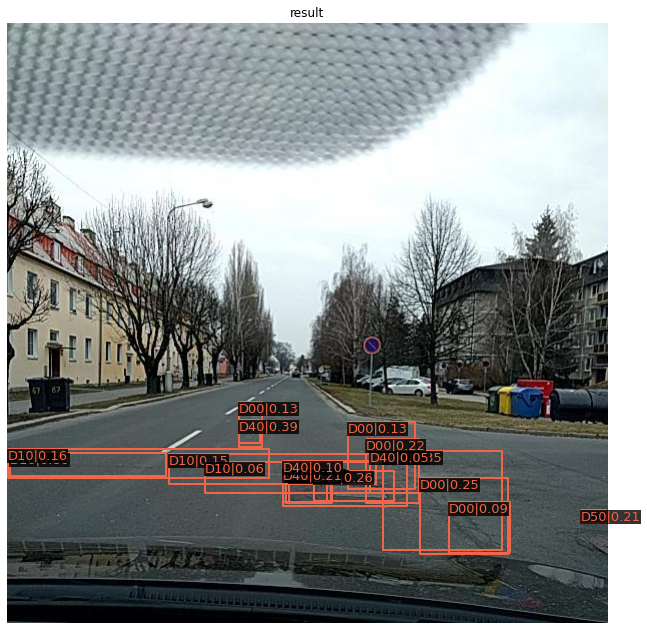

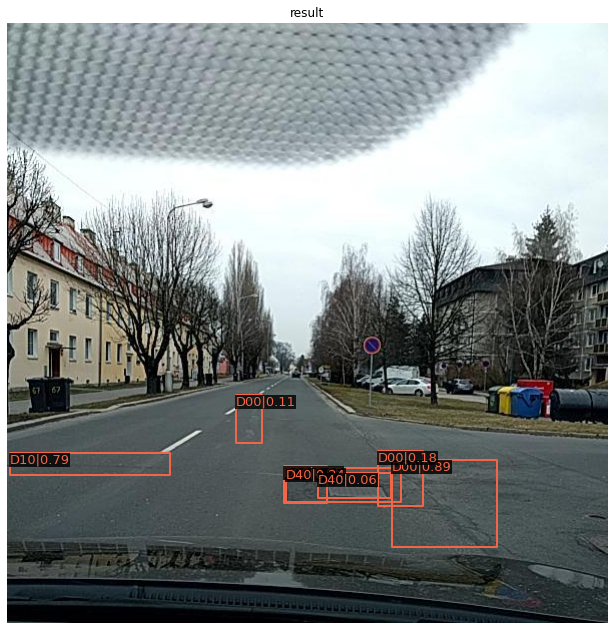

In [12]:
#We do the inference in the detector of an image of Czech Republic in order to check the results and apply the nms algorithm
import os
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

#Models initialitation
model_faster = init_detector('/content/drive/MyDrive/TFG/Checkpoints/FasterRCNN.py', '/content/drive/MyDrive/TFG/Checkpoints/epoch_12.pth', device='cuda:0')
model_cascade = init_detector('/content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN.py', '/content/drive/MyDrive/TFG/Checkpoints/epoch_10.pth', device='cuda:0')

#Models inference
Chequia_faster = inference_detector(model_faster,'/content/drive/MyDrive/TFG/Imatges Inference/Czech_000002.jpg' )
Chequia_cascade = inference_detector(model_cascade,'/content/drive/MyDrive/TFG/Imatges Inference/Czech_000002.jpg' )

#Show the results
show_result_pyplot(model_faster, '/content/drive/MyDrive/TFG/Imatges Inference/Czech_000002.jpg', Chequia_faster, score_thr=0)
show_result_pyplot(model_cascade, '/content/drive/MyDrive/TFG/Imatges Inference/Czech_000002.jpg', Chequia_cascade, score_thr=0)

In [13]:
#We apply the nms algortithm to the two models initalizate before

for x in range(0,7):
  if len(Chequia_faster[x]) ==0 and len(Chequia_cascade[x])==0:
    print(' ')
  else:
    Chequia_faster[x] = nms_ensemble(Chequia_faster[x], Chequia_cascade[x], 0.5,0,"corners")

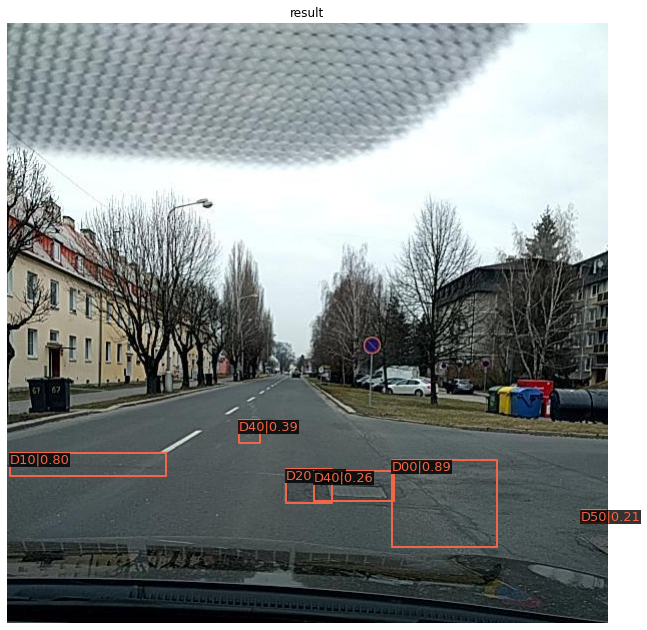

In [14]:
# We show the results after applying the NMS algorithm
show_result_pyplot(model_faster,'/content/drive/MyDrive/TFG/Imatges Inference/Czech_000002.jpg', Chequia_faster, score_thr=0.15)

##7. Results analysis

In [15]:
!pip install seaborn

In [ ]:
#Plot and save in a pdf the curves of results, How it is set it it will save the curve bbox_mAP_s in a pdf named bbox_mAP_s.

#You need to have the Logs.json, they are at the server. I usually don't execute the cell here. I use the server instead.

!python /content/mmdetection/tools/analysis_tools/analyze_logs.py plot_curve Logsfaster12.json --keys bbox_mAP_s --out bbox_mAP_s.pdf

In [16]:
#Test the trained detector with the best epoch and showing the mAP for all the clases.
#We have set it up for the faster but in the same directory you have the config for the cascade and the epoch_10, that is the best epoch for the cascade.
!python /content/mmdetection/tools/test.py \
    '/content/drive/MyDrive/TFG/Checkpoints/FasterRCNN.py'\
    '/content/drive/MyDrive/TFG/Checkpoints/epoch_12.pth'\
    --eval bbox \
    --options "classwise=True" 

/content/mmdetection/tools/test.py:101: UserWarning: --options is deprecated in favor of --eval-options
  warnings.warn('--options is deprecated in favor of --eval-options')
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[>>] 779/779, 11.4 task/s, elapsed: 69s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.70s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.406
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.746
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.366
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.310
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.317
 Average Precision  (AP) @[ 

In [17]:
#Test the trained detector with the best epoch and showing the mAP for all the clases.
#We have set it up for the faster but in the same directory you have the config for the cascade and the epoch_10, that is the best epoch for the cascade.
!python /content/mmdetection/tools/test.py \
    '/content/drive/MyDrive/TFG/Checkpoints/CascadeRCNN.py'\
    '/content/drive/MyDrive/TFG/Checkpoints/epoch_10.pth'\
    --eval bbox \
    --options "classwise=True" 

/content/mmdetection/tools/test.py:101: UserWarning: --options is deprecated in favor of --eval-options
  warnings.warn('--options is deprecated in favor of --eval-options')
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[>>] 779/779, 7.9 task/s, elapsed: 99s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.58s).
Accumulating evaluation results...
DONE (t=0.17s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.478
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.781
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.504
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.439
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.400
 Average Precision  (AP) @[ I